Przykład 1



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

iris = sns.load_dataset("iris")
print('Dane wejściowe: \n', iris.head())

# Usunięcie kolumny 'species' - nie jest zmienną objaśniającą
X = iris.drop('species', axis=1)
y = iris['species']
print('\nZmienne objaśniające: \n', X.head())

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X) # Autoskalowanie - usuniecie jednostek, kazda zmienna ustandaryzowana

# PCA i transformacja X do głównych składowych (PC)
pca = PCA()
PC = pca.fit_transform(X)

Dane wejściowe: 
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Zmienne objaśniające: 
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Opisywana zmienność: % [72.96244541 22.85076179  3.66892189  0.51787091]


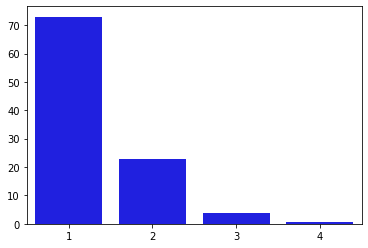

In [5]:
# Analiza zmienności opisywanej przez poszczególne PC
print('Opisywana zmienność: %', 100*pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1,5), y=100*pca.explained_variance_ratio_, color='blue')
plt.show()


Wyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 2


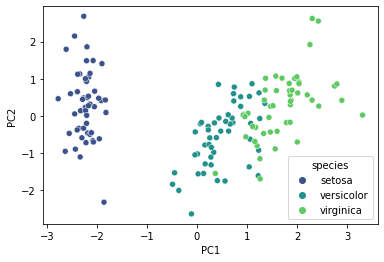

In [ ]:
# Rzut obiektów na płaszczyznę PC1/PC2
print('Wyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 2')
sns.scatterplot(x=PC[:,0], y=PC[:,1], sizes=50, palette='viridis',hue=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Wyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 3


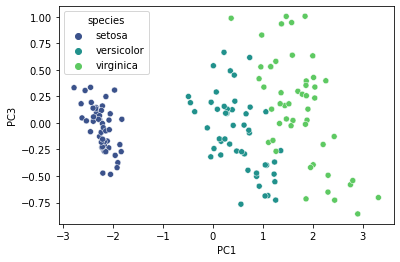

In [ ]:
# Rzut obiektów na płaszczyznę PC1/PC3
print('\nWyniki - rzut obiektów na płaszczyznę głównej składowej 1 oraz 3')
sns.scatterplot(x=PC[:,0], y=PC[:,2], sizes=50, palette='viridis',hue=y)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()


Wyniki - rzut obiektów na płaszczyznę głównej składowej 2 oraz 3


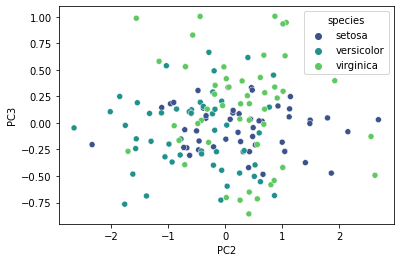

In [ ]:
# Rzut obiektów na płaszczyznę PC2/PC3
print('\nWyniki - rzut obiektów na płaszczyznę głównej składowej 2 oraz 3')
sns.scatterplot(x=PC[:,1], y=PC[:,2], sizes=50, palette='viridis',hue=y)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

Przykład 2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataset = pd.read_csv("/content/drive/My Drive/Dane/pacjent.txt", delim_whitespace=True, header=0)
print(dataset.head())
X = dataset.values[:,0:4] # Zmienne objaśniające
y = dataset['group']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) # Autoskalowanie

pca = PCA(n_components=4)
modelPC = pca.fit(X)

   par1  par2  par3  par4  group
0   7.9  12.1   2.1  19.1     10
1   9.4  13.4   1.9  18.8     10
2   8.5  11.8   1.7  21.1     10
3   1.2   3.7   6.3  55.2     30
4   8.8  14.3   7.7  58.4     20



Explained variance / %: 
 81.67
 17.62
 0.65
 0.06


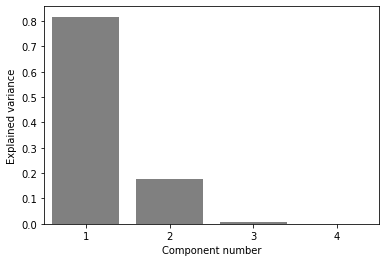

In [9]:
# Procent opisywanej zmienności w formie num. i wykresu słupkowego
print('\nExplained variance / %: ')
for i in range(4):
  print('% 4.2f' % (100*pca.explained_variance_ratio_)[i])

splot = sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_, color='grey')
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

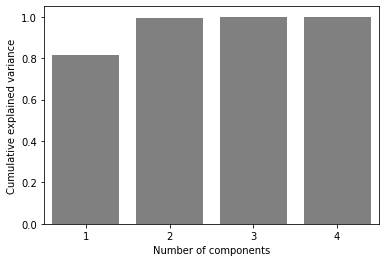

In [10]:
# Skumulowana zmienność
sns.barplot(x=np.arange(1,5), y=np.cumsum(pca.explained_variance_ratio_), color='grey')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


Component loadings :
 PC1 PC2
par1  0.51  0.45
par2  0.49  0.55
par3 -0.49  0.57
par4 -0.52  0.42


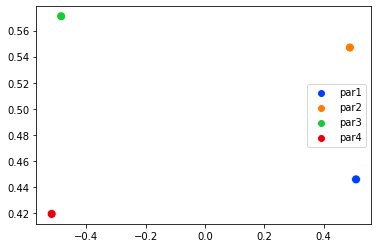

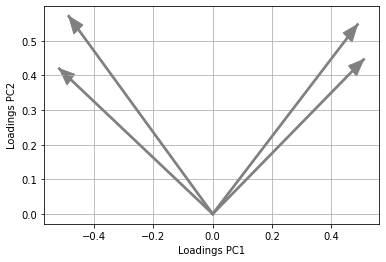

In [28]:
# Wagi składowych
print('\nComponent loadings :')
# Uwaga! Wagi dla poszczególnych składowych w wierszach
print(' PC1 PC2')
for i in range(4):
  print(dataset.columns[i], '% 4.2f' % (modelPC.components_)[0,i], '% 4.2f' % (modelPC.components_)[1,i])
  
sns.scatterplot(x=modelPC.components_[0,:],
                y=modelPC.components_[1,:],
                hue=dataset.columns[0:4], palette='bright',s=80)

for i in range(0,4): # Wektory wskazujące wagi składowych
  ax=sns.lineplot(x=[0,modelPC.components_[0,i]],
                  y=[0,modelPC.components_[1,i]], color='grey', linewidth=2.7)
  
  ax.arrow(0,0, modelPC.components_[0,i],
           modelPC.components_[1,i], lw=1, color='grey',
           head_length=.05, head_width=.04, length_includes_head=True)
  
plt.xlabel('Loadings PC1')
plt.ylabel('Loadings PC2')
plt.grid()
plt.show()

#PC1 = 0.51*par1 + 0.49*par2 – 0.49*par3 – 0.52*par4

#PC2 = 0.45*par1 + 0.55*par2 + 0.57*par3 + 0.42*par4


 Results :


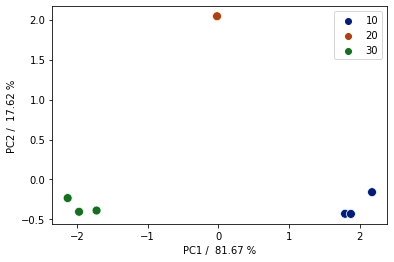

In [12]:
# Rzut obiektów na płaszczyznę PC1/PC2
print('\n Results :')
PC = modelPC.transform(X)
sns.scatterplot(x=PC[:,0], y=PC[:,1], palette='dark', hue=y,legend='full', s=80)
plt.xlabel('PC1 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[0] + ' %')
plt.ylabel('PC2 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[1] + ' %')
plt.legend()
plt.show()

Przykład 3

Explained variance / %: 
 54.79
 25.19


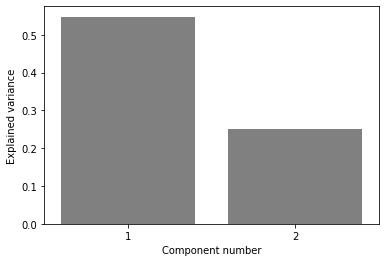

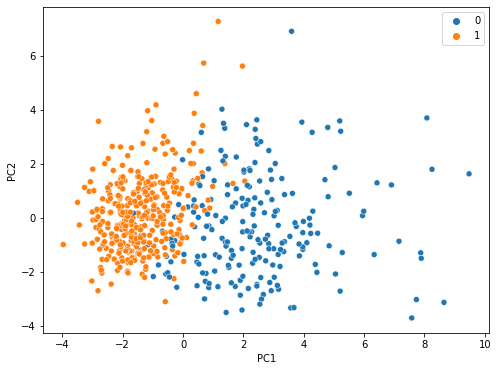

Loadings: 
[[ 0.36393793  0.15445113  0.37604434  0.36408585  0.23248053  0.36444206
   0.39574849  0.4180384   0.21523797  0.07183744]
 [-0.31392907 -0.14718091 -0.28465789 -0.30484171  0.40196232  0.26601315
   0.10428597  0.0071836   0.36830091  0.5717677 ]]


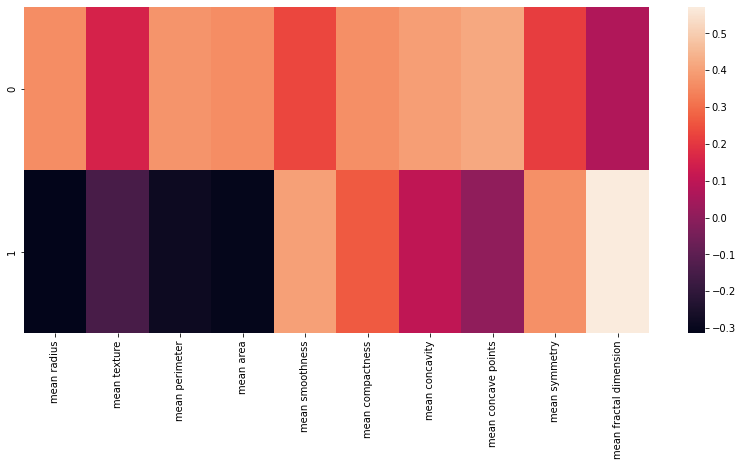

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dane do obliczeń
cancer = load_breast_cancer()
# Opis danych
#print(cancer.DESCR)
#print(cancer.target)
# Tworzenie ramki danych
df = pd.DataFrame(data=cancer.data[:,:10], columns=cancer.feature_names[:10])
# Podgląd danych
#print(df.head())

# Autoskalowanie
scaled_data = StandardScaler().fit_transform(df)

# PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(scaled_data) # tutaj wybrano tylko dwie składowe

# Procent opisywanej zmienności w formie num. i wykresu słupkowego
print('Explained variance / %: ')
for i in range(2):
  print('% 4.2f' % (100*pca.explained_variance_ratio_)[i])

splot = sns.barplot(x=np.arange(1,3), y=pca.explained_variance_ratio_, color='grey')
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

# Wyniki - rzut na PC1/PC2
plt.figure(figsize =(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1],hue = cancer['target'],cmap ='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Wagi składowych (loadings == components_)
print('Loadings: ')
print(pca.components_)

df_comp = pd.DataFrame(pca.components_ , columns = cancer['feature_names'][:10])
# Mapa cieplna - ładunki składowych
plt.figure(figsize =(14, 6))
sns.heatmap(df_comp)
plt.show()

Zadanie domowe

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataset = pd.read_csv("/content/drive/My Drive/Dane/kawa.txt", delim_whitespace=True, header=0)
print(dataset.head())
X = dataset.values[:,1:] # Zmienne objaśniające
y = dataset['Kawa']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) # Autoskalowanie

pca = PCA(n_components=4)
modelPC = pca.fit(X)

  Kawa     Zn      P    Mn    Fe     Mg    Cu     Ca    Sr    Ba    Na      K
0    A  2.899  0.139  2.68  5.98  0.173  1.78  0.089  4.13  2.92  2.30  1.466
1    R  1.393  0.158  1.22  5.61  0.161  1.68  0.094  4.14  9.10  2.14  1.448
2    A  1.933  0.134  1.41  4.62  0.174  1.34  0.097  5.59  5.31  3.34  1.493
3    R  2.997  0.173  1.98  7.34  0.165  1.31  0.087  4.40  5.01  3.38  1.541
4    A  5.440  0.140  2.93  4.66  0.173  1.12  0.090  5.75  9.17  3.01  1.422



Explained variance / %: 
 34.21
 19.85
 12.77
 10.86


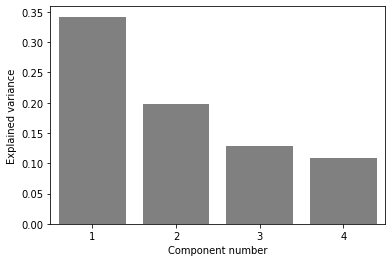

In [50]:
# Procent opisywanej zmienności w formie num. i wykresu słupkowego
print('\nExplained variance / %: ')
for i in range(4):
  print('% 4.2f' % (100*pca.explained_variance_ratio_)[i])

splot = sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_, color='grey')
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

Component loadings :
 PC1 PC2
Zn  0.13 -0.38
P -0.46 -0.16
Mn  0.37  0.00
Fe -0.39  0.12
Mg  0.31 -0.18
Cu -0.39  0.01
Ca -0.28 -0.47
Sr -0.20 -0.46
Ba  0.14  0.03
Na -0.04  0.42
K -0.31  0.43


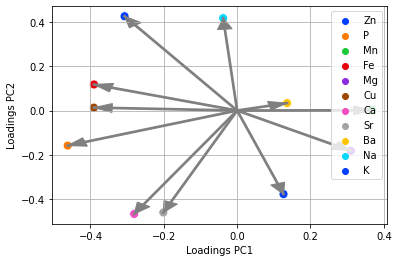

In [67]:
# Wagi składowych
print('Component loadings :')
# Uwaga! Wagi dla poszczególnych składowych w wierszach
print(' PC1 PC2')
for i in range(0, 11):
  print(dataset.columns[i+1], '% 4.2f' % (modelPC.components_)[0,i], '% 4.2f' % (modelPC.components_)[1,i])
  
sns.scatterplot(x=modelPC.components_[0,:],
                y=modelPC.components_[1,:],
                hue=dataset.columns[1:], palette='bright',s=80)

for i in range(0,11): # Wektory wskazujące wagi składowych
  ax=sns.lineplot(x=[0,modelPC.components_[0,i]],
                  y=[0,modelPC.components_[1,i]], color='grey', linewidth=2.7)
  
  ax.arrow(0,0, modelPC.components_[0,i],
           modelPC.components_[1,i], lw=1, color='grey',
           head_length=.05, head_width=.04, length_includes_head=True)
  
plt.xlabel('Loadings PC1')
plt.ylabel('Loadings PC2')
plt.grid()
plt.show()


Results :


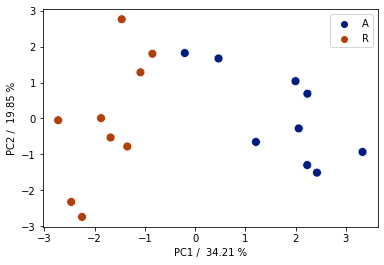

In [68]:
# Rzut obiektów na płaszczyznę PC1/PC2
print('Results :')
PC = modelPC.transform(X)
sns.scatterplot(x=PC[:,0], y=PC[:,1], palette='dark', hue=y,legend='full', s=80)
plt.xlabel('PC1 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[0] + ' %')
plt.ylabel('PC2 / '+'% 4.2f' % (100*pca.explained_variance_ratio_)[1] + ' %')
plt.legend()
plt.show()